Introduction


Problem Statement:
I am assigned with the task of exploring Brazillian E-Commerce Olist dataset and finding out answers to the following questions:
1. Finding The Customer LTV
2. Monthly performance
3. Best selling categories
4. Future sales predictions

Import libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


Obtain data

In [42]:
# leads dataset
mql = pd.read_csv('../input/marketing-funnel-olist/olist_marketing_qualified_leads_dataset.csv')
mql.head(10)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social


In [43]:
# closed deals dataset
closed_deals = pd.read_csv('../input/marketing-funnel-olist/olist_closed_deals_dataset.csv')
closed_deals.head(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
5,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0
6,c3e30ed7ac989117c7e1e719b4ac128f,92d7568ad0c5c76fd7d341b2d46f24d6,4b339f9567d060bcea4f5136b9f5949e,85fc447d336637ba1df43e793199fbc8,2018-04-16 18:18:22,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
7,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
8,a90a37898cc5f2718385a2fb981caaff,0b28859cd04d23edefee9c591fb03cd8,f42a2bd194f7802ab052a815c8de65b7,6565aa9ce3178a5caf6171827af3a9ba,2018-05-14 18:37:15,household_utilities,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0
9,0173e8d8b1d94a355b440fb67388f532,87d73636a3acf123e842bb890a4db036,9d12ef1a7eca3ec58c545c678af7869c,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-24 03:00:00,household_utilities,online_medium,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0


In [44]:
# marketing funnel dataset (NaNs are leads that did not close a deal)
mf = mql.merge(closed_deals, on='mql_id', how='left')
mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         8000 non-null   object 
 1   first_contact_date             8000 non-null   object 
 2   landing_page_id                8000 non-null   object 
 3   origin                         7940 non-null   object 
 4   seller_id                      842 non-null    object 
 5   sdr_id                         842 non-null    object 
 6   sr_id                          842 non-null    object 
 7   won_date                       842 non-null    object 
 8   business_segment               841 non-null    object 
 9   lead_type                      836 non-null    object 
 10  lead_behaviour_profile         665 non-null    object 
 11  has_company                    63 non-null     object 
 12  has_gtin                       64 non-null     o

In [33]:
# sellers dataset
sellers = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [35]:
# marketing funnel merged with sellers (this way you get seller location)
mf_sellers = mf.merge(sellers, on='seller_id', how='left')
mf_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         8000 non-null   object 
 1   first_contact_date             8000 non-null   object 
 2   landing_page_id                8000 non-null   object 
 3   origin                         7940 non-null   object 
 4   seller_id                      842 non-null    object 
 5   sdr_id                         842 non-null    object 
 6   sr_id                          842 non-null    object 
 7   won_date                       842 non-null    object 
 8   business_segment               841 non-null    object 
 9   lead_type                      836 non-null    object 
 10  lead_behaviour_profile         665 non-null    object 
 11  has_company                    63 non-null     object 
 12  has_gtin                       64 non-null     o

In [36]:
# order items dataset
items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [37]:
# marketing funnel merged with items (this way you get products sold by sellers)
mf_items = mf.merge(items, on='seller_id', how='left')
mf_items.head(10)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76
5,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,d8d281c1a1398a1e835fdc4adfb81e2a,1.0,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41
6,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,e5858127da61f07285827883e605254b,1.0,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00
7,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1. Customer LTV**

Lifetime Value: Total Gross Revenue - Total Cost

SInce total cost by each customer is not given we take Revenue as the life time value of the customer

Scrub data

In [88]:
df_customer=pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
df_orders=pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')

Customer Segmentation with RFM analysis

In [89]:
## getting order id by customer purchases 

df_customer_order=pd.merge(df_customer,df_orders[['order_id','customer_id','order_purchase_timestamp']],on='customer_id')


In [90]:
## payments in same order id are combined to get total spending on an order
paid=df_payments[['order_id','payment_value']].groupby('order_id').sum().reset_index()

In [91]:
# now the total payment by each order is merged to the cutomer who has bought it to find the total amount purchase
df_customer_order_rev=pd.merge(df_customer_order,paid,on='order_id')

In [92]:
# unwanted columns are dropped
df_customer_order_rev.drop(['customer_zip_code_prefix','customer_city','customer_state'],axis=1,inplace=True)

In [93]:
df_customer_order_rev['order_purchase_timestamp']=pd.to_datetime(df_customer_order_rev['order_purchase_timestamp']).dt.date

In [94]:
# find the last date on which customer made the purchase
recency=pd.DataFrame(df_customer_order_rev.groupby('customer_unique_id')['order_purchase_timestamp'].max())

In [95]:
# we take the maximum date of purchase made by customers as the date to calculate the recency of the purchase
## 2018-10-17
recency['recent_days']=recency['order_purchase_timestamp'].max()-recency['order_purchase_timestamp']
recency['recent_days']=recency['recent_days'].dt.days

In [96]:
# the number of times a unique customer has made purchase
frequency=pd.DataFrame(df_customer_order_rev.groupby('customer_unique_id')['customer_id'].count())

In [11]:
monetary=pd.DataFrame(df_customer_order_rev[['customer_unique_id','payment_value']].groupby('customer_unique_id')['payment_value'].sum())

In [12]:
df_rfm=pd.merge(recency,frequency,on='customer_unique_id')
df_rfm=pd.merge(df_rfm,monetary,on='customer_unique_id')

In [13]:
# Freqency - Number of purchase made
## Recency- Days from last purchase
## Monetary-- total amount purchase for by a customer
df_rfm.drop(['order_purchase_timestamp'],axis=1,inplace=True)
df_rfm.reset_index(inplace=True)
df_rfm.columns=['Cust_unique_Id','Recency','Frequency','Monetary']
#use CustomerID as index
df_rfm.set_index('Cust_unique_Id',inplace=True)
df_rfm

,Recency,Frequency,Monetary
Cust_unique_Id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
0000f46a3911fa3c0805444483337064,586,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
0004aac84e0df4da2b147fca70cf8255,337,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58
ffff371b4d645b6ecea244b27531430a,617,1,112.46


In [14]:
## the descriptive stats for the RFM analysis
df_rfm.describe()

,Recency,Frequency,Monetary
count,96095.000000,96095.000000,96095.000000
mean,288.103866,1.034809,166.594226
std,153.411050,0.214385,231.428912
min,0.000000,1.000000,0.000000
25%,164.000000,1.000000,63.120000
50%,269.000000,1.000000,108.000000
75%,397.000000,1.000000,183.530000
max,773.000000,17.000000,13664.080000


In [15]:
(df_rfm[df_rfm['Frequency']>1].shape[0]/96095)*100

3.1187886986835944

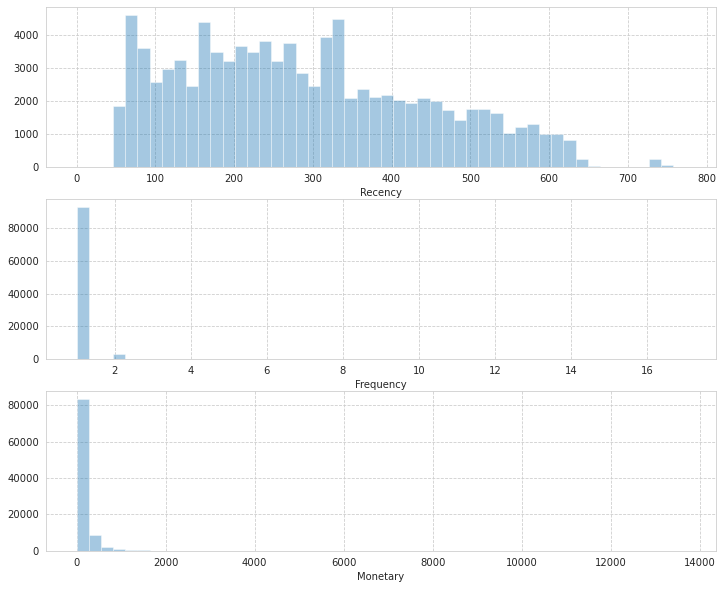

In [16]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recency'],kde=False)
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frequency'],kde=False)
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetary'],kde=False)
# Show the plot
plt.show()

**2. Sales Performance Overview**

In this part I will answer to following questions:
- What has performance been monthly?
- What are the best selling categories?
For this reason I will calcualte total revenue from closed deals and find out the top revenue-generating segment.


In [99]:
# Load datasets
order_items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv',
                     parse_dates=['order_purchase_timestamp'])
products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
product_translation = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

In [100]:
closed_deals.tail(100)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
742,0e9c14002f9268601c57837930261014,6eeed17989b0ae47c9f11ece6f38ea90,9d12ef1a7eca3ec58c545c678af7869c,fbf4aef3f6915dc0c3c97d6812522f6a,2018-04-30 16:06:05,car_accessories,online_medium,eagle,NaN,NaN,NaN,reseller,NaN,0.0
743,baf5ecd84c6a8766519b98f66eec1511,e5d7bbbca541b3b39e1649f94074b963,b90f87164b5f8c2cfa5c8572834dbe3f,4ef15afb4b2723d8f3d81e51ec7afefe,2018-06-11 21:01:55,health_beauty,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
744,7e4bb8c8f3bdcbece5996f24ba507120,843c73eda46e28b278031033b616bc8e,4b339f9567d060bcea4f5136b9f5949e,de63de0d10a6012430098db33c679b0b,2018-08-14 14:48:04,home_decor,industry,wolf,True,True,NaN,manufacturer,100.0,0.0
745,b4abf3d319afe2544a5dd0966141ef10,876300c1c122f7fafd3ba74a478221f4,323cff2ceea1814239bc2c7e614d260d,068066e24f0c643eb1d089c7dd20cd73,2018-08-17 03:00:00,audio_video_electronics,online_medium,cat,True,NaN,1-5,reseller,2.0,20000.0
746,ee68544f42eef8386730823cff7446cc,8f28d70a98ca556691300d08ebdddc88,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-13 20:51:13,home_decor,online_big,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [101]:
#get some info about dataframes

print(closed_deals.shape)
print(order_items.shape)
print(orders.shape)
print(products.shape)
print(product_translation.shape)

(842, 14)
(112650, 7)
(99441, 8)
(32951, 9)
(71, 2)


In [102]:
# Merge all dataframes
df = pd.merge(closed_deals,order_items,
                how='inner', on='seller_id')
df = pd.merge(df, orders,
                how='inner', on='order_id')
df = pd.merge(df, products,
                how='inner', on='product_id')
df = pd.merge(df, product_translation,
                how='left', on='product_category_name')
df.shape

(5044, 36)

In [103]:
df

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,2018-07-17 00:00:00,pet_shop,56.0,1538.0,2.0,625.0,23.0,17.0,19.0,pet_shop
1,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,2018-08-07 00:00:00,ferramentas_jardim,25.0,432.0,1.0,2825.0,29.0,29.0,29.0,garden_tools
2,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,2018-07-13 00:00:00,pet_shop,53.0,1494.0,2.0,900.0,26.0,19.0,23.0,pet_shop
3,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,...,2018-08-17 00:00:00,sinalizacao_e_seguranca,60.0,1170.0,1.0,450.0,16.0,5.0,16.0,signaling_and_security
4,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,...,2018-08-08 00:00:00,sinalizacao_e_seguranca,60.0,1170.0,1.0,450.0,16.0,5.0,16.0,signaling_and_security
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,676207ddcc8087437135a4b461fc07cb,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,cat,NaN,NaN,...,2018-08-15 00:00:00,beleza_saude,33.0,3664.0,1.0,430.0,22.0,17.0,21.0,health_beauty
5040,676207ddcc8087437135a4b461fc07cb,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,cat,NaN,NaN,...,2018-08-17 00:00:00,beleza_saude,36.0,1129.0,1.0,473.0,22.0,18.0,21.0,health_beauty
5041,676207ddcc8087437135a4b461fc07cb,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,cat,NaN,NaN,...,2018-08-07 00:00:00,beleza_saude,47.0,1123.0,1.0,750.0,20.0,18.0,23.0,health_beauty
5042,98b18a14a0472c9e4a4eb0bb77ae3592,4fe2f67634d00c021aa01f96b6f2d68e,9d12ef1a7eca3ec58c545c678af7869c,a8387c01a09e99ce014107505b92388c,2018-06-07 21:23:45,food_supplement,online_small,cat,NaN,NaN,...,2018-08-29 00:00:00,beleza_saude,57.0,3110.0,1.0,125.0,19.0,15.0,17.0,health_beauty


In [105]:
# Sort out orders not devliered to customers
data = data[data['order_status'] == 'delivered']

# Add a 'year-month' column
data['order_purchase_timestamp(y-m)'] = data['order_purchase_timestamp'].dt.to_period('M')

print(data.shape)
data.head(3)

TypeError: list indices must be integers or slices, not str

Monthly Revenues by Business Segment


In [22]:
columns = df.groupby(by='business_segment') \
           .price \
           .sum() \
           .sort_values(ascending=False) \
           .index

monthly_revenue = df.groupby(['order_purchase_timestamp(y-m)', 'business_segment']) \
                              .price \
                              .sum() \
                              .unstack(level=1, fill_value=0)

monthly_revenue = monthly_revenue[columns]
monthly_revenue

business_segment,watches,health_beauty,household_utilities,audio_video_electronics,small_appliances,home_decor,pet,construction_tools_house_garden,car_accessories,home_appliances,...,books,music_instruments,toys,phone_mobile,food_drink,air_conditioning,gifts,handcrafted,games_consoles,party
order_purchase_timestamp(y-m),,,,,,,,,,,,,,,,,,,,,
2018-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-02,5935.46,28.00,443.60,20.00,140.00,1042.50,211.96,677.56,178.90,0.00,...,0.00,1447.90,234.69,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-03,27439.45,567.50,2233.49,2842.87,12620.00,531.50,377.86,1154.44,347.00,145.97,...,19.90,179.90,238.10,642.00,14.90,0.0,0.00,0.0,0.0,0.00
2018-04,21918.00,6793.63,5008.94,3074.49,12529.90,2857.34,4586.34,2611.66,4266.00,869.98,...,344.45,439.79,923.06,1189.90,223.50,0.0,189.00,0.0,0.0,0.00
2018-05,31286.81,17073.44,10153.85,9813.11,14447.50,6134.17,3316.38,6499.96,3451.86,435.00,...,3023.27,494.86,670.41,152.90,413.80,0.0,0.00,0.0,0.0,0.00
2018-06,11547.88,25298.46,10497.65,10067.49,3909.80,8414.03,6292.87,4591.75,5414.06,2494.49,...,1020.19,973.59,1116.54,1247.59,302.40,282.0,0.00,93.8,0.0,0.00
2018-07,7393.44,20035.20,11568.15,12017.70,1187.20,10980.97,9526.63,8485.62,6637.60,16278.83,...,1554.74,1189.70,1153.53,449.70,1148.49,278.0,482.98,93.8,438.0,0.00
2018-08,10380.04,19128.11,11375.19,11587.78,2840.47,13848.82,16186.79,7986.08,9710.56,6016.90,...,980.34,1113.90,1220.53,599.30,1599.84,2090.0,339.29,688.3,219.0,388.98


In [23]:
monthly_revenue.tail(10)

business_segment,watches,health_beauty,household_utilities,audio_video_electronics,small_appliances,home_decor,pet,construction_tools_house_garden,car_accessories,home_appliances,...,books,music_instruments,toys,phone_mobile,food_drink,air_conditioning,gifts,handcrafted,games_consoles,party
order_purchase_timestamp(y-m),,,,,,,,,,,,,,,,,,,,,
2018-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-02,5935.46,28.00,443.60,20.00,140.00,1042.50,211.96,677.56,178.90,0.00,...,0.00,1447.90,234.69,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-03,27439.45,567.50,2233.49,2842.87,12620.00,531.50,377.86,1154.44,347.00,145.97,...,19.90,179.90,238.10,642.00,14.90,0.0,0.00,0.0,0.0,0.00
2018-04,21918.00,6793.63,5008.94,3074.49,12529.90,2857.34,4586.34,2611.66,4266.00,869.98,...,344.45,439.79,923.06,1189.90,223.50,0.0,189.00,0.0,0.0,0.00
2018-05,31286.81,17073.44,10153.85,9813.11,14447.50,6134.17,3316.38,6499.96,3451.86,435.00,...,3023.27,494.86,670.41,152.90,413.80,0.0,0.00,0.0,0.0,0.00
2018-06,11547.88,25298.46,10497.65,10067.49,3909.80,8414.03,6292.87,4591.75,5414.06,2494.49,...,1020.19,973.59,1116.54,1247.59,302.40,282.0,0.00,93.8,0.0,0.00
2018-07,7393.44,20035.20,11568.15,12017.70,1187.20,10980.97,9526.63,8485.62,6637.60,16278.83,...,1554.74,1189.70,1153.53,449.70,1148.49,278.0,482.98,93.8,438.0,0.00
2018-08,10380.04,19128.11,11375.19,11587.78,2840.47,13848.82,16186.79,7986.08,9710.56,6016.90,...,980.34,1113.90,1220.53,599.30,1599.84,2090.0,339.29,688.3,219.0,388.98


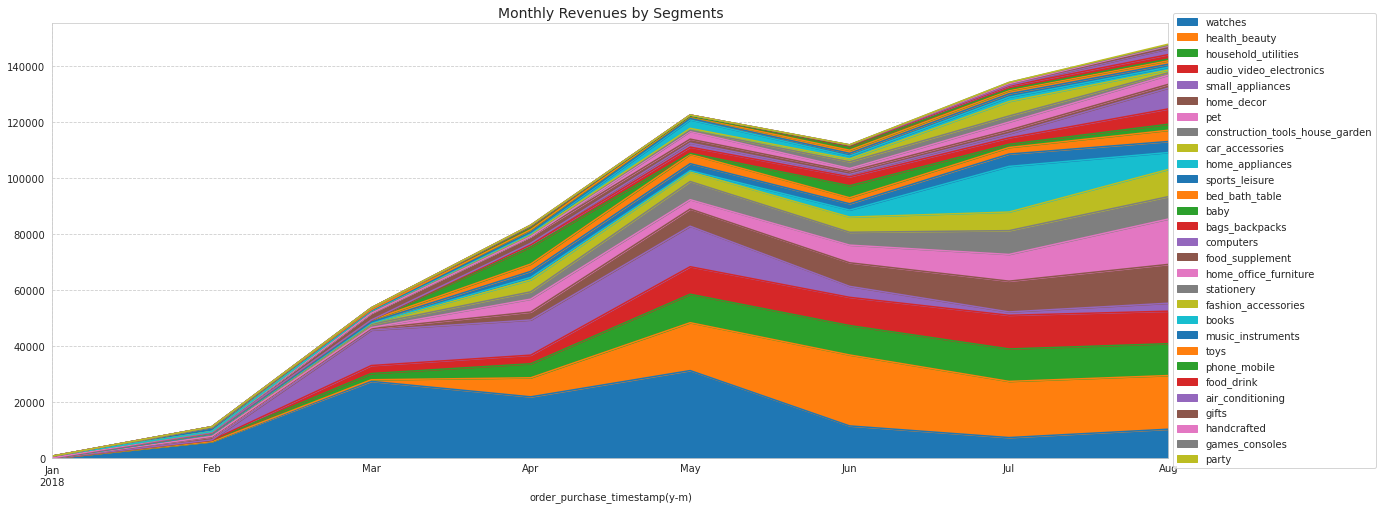

In [24]:
# Plot the monthly revenues by segment
monthly_revenue.plot.area(figsize=(20,8))

plt.title('Monthly Revenues by Segments', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

Total revenues across 29 segments came in at 664,858 in the first eight months of 2018.
The biggest segment was 'watches', which generated 17.4% of total revenues (115,901).

In [25]:
# Create watches segment dataframe
watches = df[df.business_segment == 'watches']
watches.shape

(586, 37)

In [26]:
# Create monthly revenues by product category
columns = watches.groupby('product_category_name_english') \
              .price \
              .sum() \
              .sort_values(ascending=False) \
              .index

monthly_revenue_category = watches.groupby(['order_purchase_timestamp(y-m)', 'product_category_name_english']) \
                                  .price \
                                  .sum() \
                                  .unstack(level=1, fill_value=0)

monthly_revenue_category = monthly_revenue_category[columns]
monthly_revenue_category

product_category_name_english,watches_gifts,audio,electronics,sports_leisure,cool_stuff,market_place,perfumery
order_purchase_timestamp(y-m),,,,,,,
2018-02,5065.36,590.00,280.10,0.0,0.0,0.0,0.0
2018-03,19106.69,7547.76,240.00,545.0,0.0,0.0,0.0
2018-04,15588.14,5609.89,719.97,0.0,0.0,0.0,0.0
2018-05,29070.81,2216.00,0.00,0.0,0.0,0.0,0.0
2018-06,9727.88,1172.00,0.00,468.0,180.0,0.0,0.0
2018-07,5747.44,876.00,370.00,0.0,180.0,0.0,220.0
2018-08,8077.86,550.00,1464.58,0.0,0.0,287.6,0.0


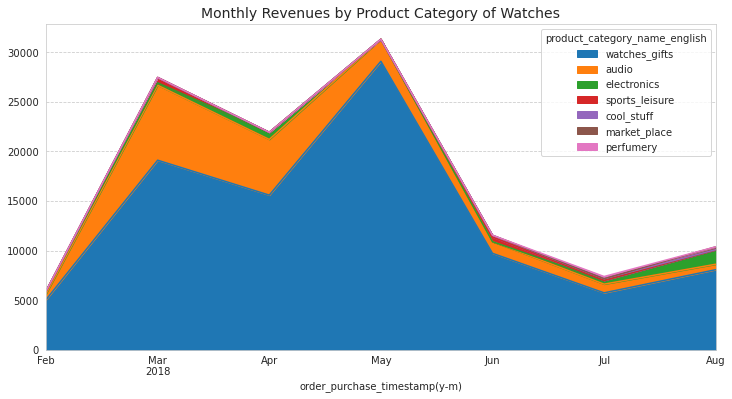

In [27]:
# Plot the monthly revenues by category
monthly_revenue_category.plot.area(figsize=(12,6))
plt.title('Monthly Revenues by Product Category of Watches', fontsize=14);

In [28]:
# Create 'seller - product category' table
cols = watches.groupby('product_category_name_english') \
              .price \
              .sum() \
              .sort_values(ascending=False) \
              .index

watches_seller_revenue = watches.groupby(['seller_id', 'product_category_name_english']) \
                                .price \
                                .sum() \
                                .unstack(level=1, fill_value=0)

watches_seller_revenue = watches_seller_revenue[cols]
watches_seller_revenue['total'] = watches_seller_revenue.sum(axis=1)

watches_seller_revenue

product_category_name_english,watches_gifts,audio,electronics,sports_leisure,cool_stuff,market_place,perfumery,total
seller_id,,,,,,,,
7d13fca15225358621be4086e1eb0964,88919.28,18561.65,3074.65,1013.0,360.0,287.6,220.0,112436.18
bce6a5ecf98e99fd2a8868b15c51f04b,3464.90,0.00,0.00,0.0,0.0,0.0,0.0,3464.90


'watches_gifts' category generated 79.7% of total revenue of segment.
'watches_gifts' revenue soared in March and reached its peak in May. This category seems a seasonal item.
Except 'watches_gifts', product categories are irrelevant to watches segment.


In [29]:
# Create 'category - seller' table
index = watches.groupby('product_category_name_english') \
               .price \
               .sum() \
               .sort_values() \
               .index

seller_category_revenue = watches.groupby(['seller_id', 'product_category_name_english']) \
                                 .price \
                                 .sum() \
                                 .unstack(level=0, fill_value=0) \
                                 
seller_category_revenue = seller_category_revenue.reindex(index)
seller_category_revenue

seller_id,7d13fca15225358621be4086e1eb0964,bce6a5ecf98e99fd2a8868b15c51f04b
product_category_name_english,,
perfumery,220.00,0.0
market_place,287.60,0.0
cool_stuff,360.00,0.0
sports_leisure,1013.00,0.0
electronics,3074.65,0.0
audio,18561.65,0.0
watches_gifts,88919.28,3464.9


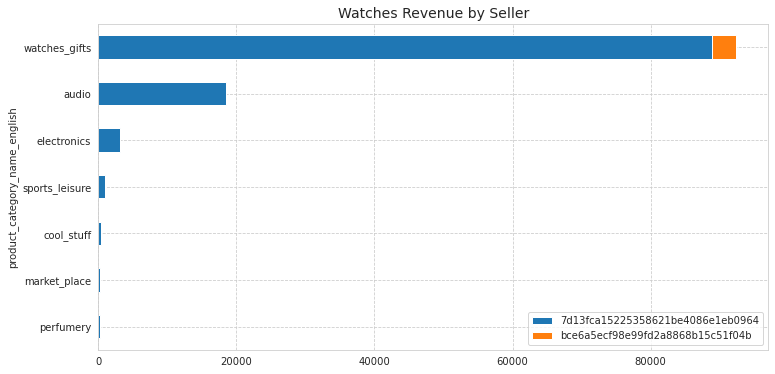

In [30]:
# Plot the above table
seller_category_revenue.plot.barh(stacked=True, figsize=(12,6))

plt.title('Watches Revenue by Seller', fontsize=14)
plt.legend(loc='lower right');

Though 'watches' segment is the largest part of revenue, it has only two sellers.
Furthermore, the leading seller generated 97.0% of segment revenue.

>****Predict future revenue****

In [37]:

orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
order_item = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')

In [38]:
orders = orders[['order_id', 'order_purchase_timestamp']]
order_item = order_item[['order_id', 'price']]

In [39]:
orders_items = pd.merge(orders, order_item, on='order_id')
orders_items.head()

,order_id,order_purchase_timestamp,price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90


In [40]:
df_final = orders_items[['order_purchase_timestamp', 'price']]

df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_purchase_timestamp'] = df_final['order_purchase_timestamp'].dt.date
df_final=df_final[(df_final['order_purchase_timestamp'] > dt.strptime('2017-01-01', '%Y-%m-%d').date()) &  (df_final['order_purchase_timestamp'] < dt.strptime('2018-09-30', '%Y-%m-%d').date())]

df_final.columns = ['order_purchase_timestamp', 'valor']
df_final = df_final.sort_values('order_purchase_timestamp')
df_final.head(100)

,order_purchase_timestamp,valor
7318,2017-01-05,34.9
11515,2017-01-05,10.9
82432,2017-01-05,10.9
74264,2017-01-05,10.9
11444,2017-01-05,10.9
...,...,...
3284,2017-01-13,69.9
90747,2017-01-13,69.9
38602,2017-01-14,24.9
61723,2017-01-14,29.9


In [41]:
df_final = df_final[['order_purchase_timestamp', 'valor']]

df_final = df_final.groupby(['order_purchase_timestamp']).sum()
df_groupby_copy = df_final

df_groupby_copy['data'] = df_final.index.values
df_groupby_copy_ARIMA = df_groupby_copy
df_groupby_copy.head()

,valor,data
order_purchase_timestamp,,
2017-01-05,396.90,2017-01-05
2017-01-06,916.38,2017-01-06
2017-01-07,1351.90,2017-01-07
2017-01-08,709.58,2017-01-08
2017-01-09,673.79,2017-01-09


In [42]:
df_groupby_copy = df_groupby_copy[['valor']]
df_groupby_copy.head()

,valor
order_purchase_timestamp,
2017-01-05,396.90
2017-01-06,916.38
2017-01-07,1351.90
2017-01-08,709.58
2017-01-09,673.79


In [43]:
df_groupby_copy.head()


,valor
order_purchase_timestamp,
2017-01-05,396.90
2017-01-06,916.38
2017-01-07,1351.90
2017-01-08,709.58
2017-01-09,673.79


In [44]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [45]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(18, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.plot(line2, label=label2, linewidth=2)
    ax.set_ylabel('valor', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)

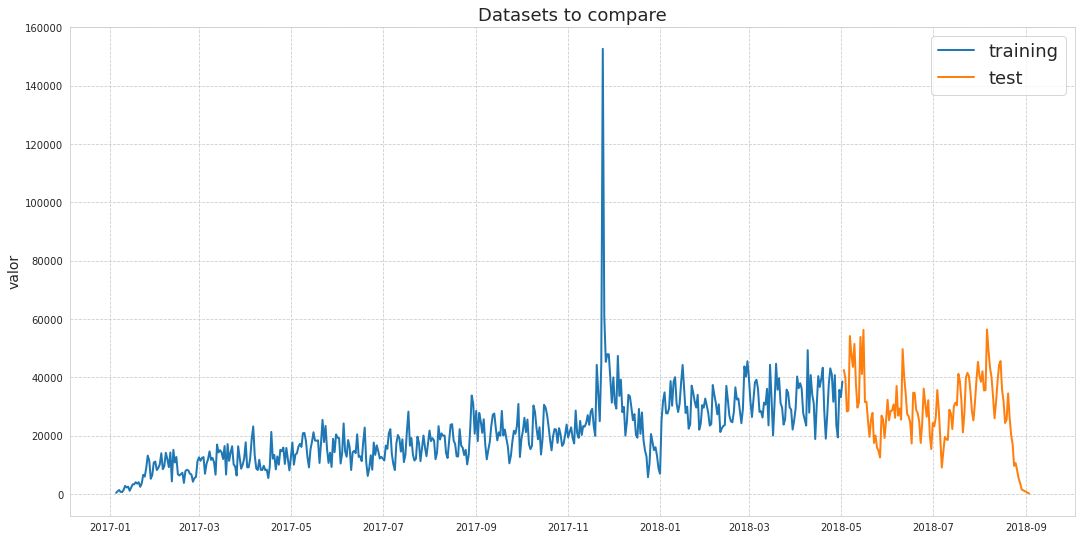

In [46]:
train, test = train_test_split(df_groupby_copy, test_size=0.2)

line_plot(train.valor, test.valor, 'training', 'test', 'Datasets to compare')


In [47]:
def create_lookback(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [48]:
test.head()

,valor
order_purchase_timestamp,
2018-05-03,42497.77
2018-05-04,39730.93
2018-05-05,28306.45
2018-05-06,28565.97
2018-05-07,54167.48


In [49]:
train.head()

,valor
order_purchase_timestamp,
2017-01-05,396.90
2017-01-06,916.38
2017-01-07,1351.90
2017-01-08,709.58
2017-01-09,673.79


In [50]:
training_set = train.values
training_set = np.array(training_set).reshape((-1,1))
training_set = np.reshape(training_set, (len(training_set), 1))

test_set = test.values
test_set = np.array(test_set).reshape((-1,1))
test_set = np.reshape(test_set, (len(test_set), 1))

#scale datasets
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

# create datasets which are suitable for time series forecasting
look_back = 1
X_train, Y_train = create_lookback(training_set, look_back)
X_test, Y_test = create_lookback(test_set, look_back)

 # reshape datasets so that they will be ok for the requirements of the LSTM model in Keras
X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

In [51]:
model = Sequential()

model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

history = model.fit(X_train, Y_train, epochs=50, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test), verbose=1,
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 256)            264192    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
31/31 [==============================] - 5s 37ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 2/50
31/31 [==============================] - 0s 9ms/step - loss: 0.0112 - val_loss: 0.0042
Epoch 3/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0109 - val_loss: 0.0037
Epoch 4/50
31/31 [==============================] - 0s 9ms/step - loss: 0.0064 - val

> ****Predictions****

In [52]:
prediction = model.predict(X_test)


In [53]:
prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

prediction2_inverse = np.array(prediction_inverse[:,0][1:])
Y_test2_inverse = np.array(Y_test_inverse[:,0])

In [54]:
Y_test2_inverse_without_last = Y_test2_inverse[:-1]
RMSE = sqrt(mean_squared_error(Y_test2_inverse_without_last, prediction2_inverse))
print('Test RMSE: %.3f' % RMSE)

Test RMSE: 3304.407


In [55]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)


In [56]:
Test_Dates = test.index

trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 244, 155)'),width = 2))

trace2 = go.Scatter(x=Test_Dates, y=prediction2_inverse, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'With purchase date information to predict future sales',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'purchase value'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating1')


****ARIMA Prediction****
****

In [63]:
df_groupby_copy.head()


,valor
order_purchase_timestamp,
2017-01-05,396.90
2017-01-06,916.38
2017-01-07,1351.90
2017-01-08,709.58
2017-01-09,673.79


In [64]:
y = df_groupby_copy

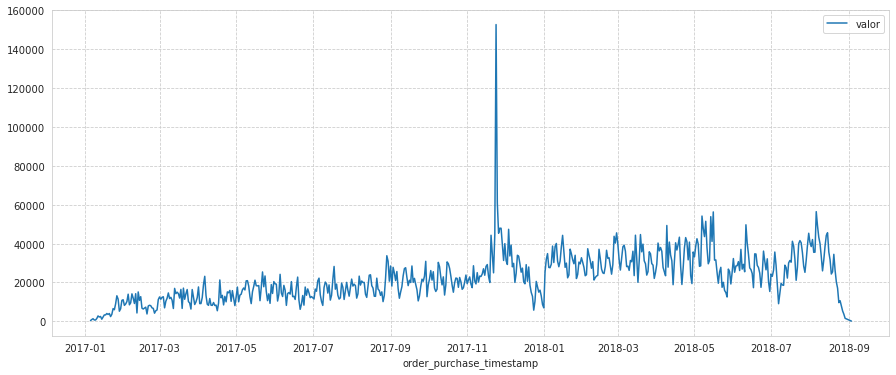

In [65]:
y.plot(figsize=(15, 6))
plt.show()

In [66]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools

warnings.filterwarnings('ignore')

In [67]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3192      0.103      3.092      0.002       0.117       0.522
ma.L1         -0.8211      0.083     -9.885      0.000      -0.984      -0.658
ar.S.L12      -0.0673      0.104     -0.647      0.518      -0.271       0.137
ma.S.L12      -0.9844      0.040    -24.894      0.000      -1.062      -0.907
sigma2      1.412e+08   1.06e-09   1.33e+17      0.000    1.41e+08    1.41e+08


In [68]:
pred = results.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()

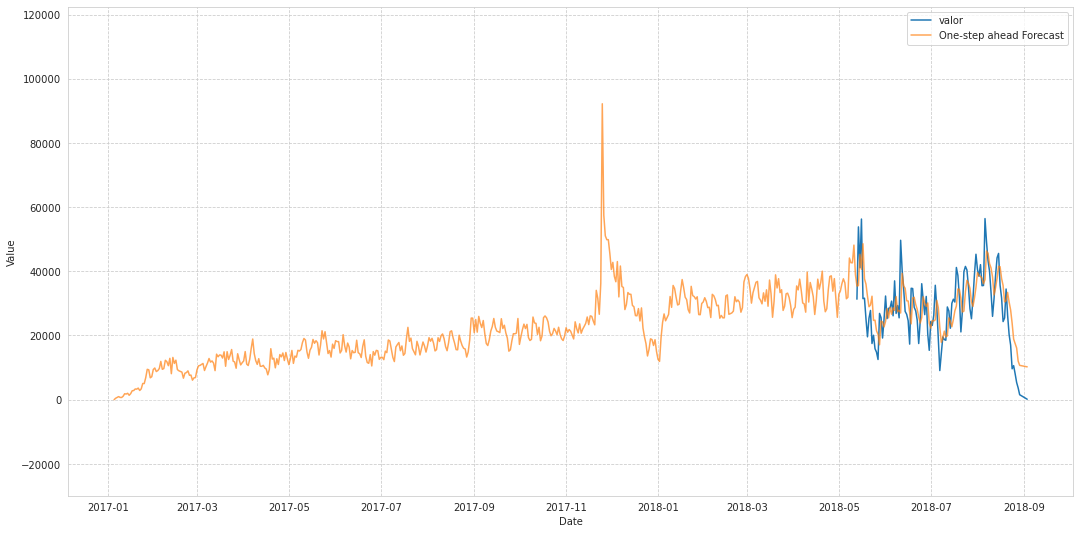

In [69]:
ax = y[493:].plot(label='observed', figsize=(18, 9))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='white', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()

plt.show()

Conclusion:
    
  We have a clear picture that:
    - From all customers only 3% are recurring and remaining 97% are just below 1 year purchasers.
    - Total revenues across 29 segments came in at 664,858 in the first eight months of 2018. The biggest segment was 'watches', which generated 17.4% of total revenues (115,901).
    - The best categories are watches and audio
    - Though 'watches' segment is the largest part of revenue, it has only two sellers. Furthermore, the leading seller generated 97.0% of segment revenue. 